# Geomorphons test on Mohns Ridge

Packages
- rasterio is a library for reading and writing geospatial raster data. 
- WhiteboxTools is a GIS (Geographical Information System) toolkit for advanced geospatial data analysis and modeling.

When working with images in WhiteboxTools, it is recommended to use the *rasterio* library for reading and writing raster data, and other libraries such as *numpy* or *scikit-image* for image processing.

Process
1. Read/Load in Bathymetry data
2. Create and visualize hillshade
3. Compare different DEM smoothing algorithms
4. Calculate Geomorphons
5. Compare Geomorphons on original DEM vs smoothend DEM

In [65]:
# Initialize a virtual environment and install requirements.
# python -m venv whitebox_env
# whitebox_env\scripts\activate
# pip install --upgrade pip
# pip install wheel
# pip install -r requirements.txt

# pip freeze > requirements.txt

# python -m ipykernel install --user --name=whitebox_kernel

In [66]:
# !jupyter kernelspec list

In [67]:
# Loading packages/libraries
import os, sys
import rasterio
from scipy import ndimage
import whitebox

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap

In [68]:
# Set directory
working_dir = "C:/Users/HP/uio.prog/MSc/small_aoi/whitebox_test/"
bathy_mosaic_name = "data_in/Bathy_mosaic_50m.tif" # large mosaic 50m
bathy_mosaic_path = working_dir + bathy_mosaic_name
bathy_name = "data_in/Bathy_small_aoi_25m.tif"  # smaller AOI 25m
bathy_path = working_dir + bathy_name

print("Path to test image: " + bathy_path)

Path to test image: C:/Users/HP/uio.prog/MSc/small_aoi/whitebox_test/data_in/Bathy_small_aoi_25m.tif


In [69]:
# Initialize WhiteboxTools
from WBT.whitebox_tools import WhiteboxTools
wbt = WhiteboxTools()
wbt.set_working_dir(working_dir) # Sets the working directory

Loading images with *rasterio*, before geospatial operations with *whitebox*

In [70]:
# Open the image file with rasterio
with rasterio.open(bathy_path) as src:
    # Read the image data
    bathy = src.read()
    # Access the meta-data of the image
    bathy_metadata = src.profile
    
# Access the shape of the image data
print("Image Shape:", bathy.shape)
# Access the meta-data of the image
print("Image metadata:", bathy_metadata)

Image Shape: (1, 1228, 1354)
Image metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 3.3999999521443642e+38, 'width': 1354, 'height': 1228, 'count': 1, 'crs': CRS.from_epsg(25833), 'transform': Affine(25.0, 0.0, 258625.0,
       0.0, -25.0, 8185525.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


### Visualizing Bathymetry data

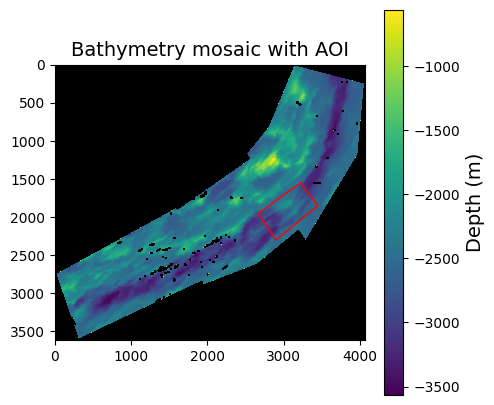

In [71]:
# Load and plot bathymetry image - Large mosaic with AOI
with rasterio.open(bathy_mosaic_path) as src:
    bathy = src.read(1)

# Plot the bathymetry image with the viridis colormap
fig, ax = plt.subplots(figsize=(5, 5))
norm = colors.Normalize(vmin=-3565, vmax=-560)
im = ax.imshow(bathy, norm=norm)

# Define the vertices of the polygon: (top-right, lower-right, lower-left, top-left)
# Create a polygon with red border and transparent fill
verts = [(3220, 1550), (3450, 1850), (2900, 2300), (2670, 1950) ]
poly = patches.Polygon(verts, edgecolor='red', facecolor='none')
ax.add_patch(poly)

# Get colormap and set outside color limits to black
cmap = im.get_cmap(); cmap.set_over('k')

# Add a colorbar to the plot
cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.ax.set_ylabel('Depth (m)', fontsize=14)

# Set axis labels and title
ax.set_title('Bathymetry mosaic with AOI', fontsize=14); plt.show()

In [72]:
# General plotting function
def plotImage(file, title, cbarName, lower, upper):
    """ Plots image of output product
    lower and upper set threshold for the colormap. 
    Set both to zero if no threshold preferences"""
    
    # Load and plot bathymetry image
    with rasterio.open(working_dir + file) as src:
        image = src.read(1)

    # Plot the bathymetry image
    fig, ax = plt.subplots(figsize=(5, 5))
    if (lower != 0) or (upper != 0):
        norm = colors.Normalize(vmin=lower, vmax=upper)
        im = ax.imshow(image, norm=norm)
    else:
        im = ax.imshow(image)
        
    # Set the x and y limits to zoom in on the central region of the image
    ax.set_xlim(200, 1200); ax.set_ylim(1100, 100)
    
    # Get colormap and set outside color limits to black
    cmap = im.get_cmap(); cmap.set_over('k')

    # Add a colorbar to the plot
    cbar = fig.colorbar(im, ax=ax, orientation='vertical')
    cbar.ax.set_ylabel(cbarName, fontsize=14)

    # Set axis labels and title
    ax.set_title(title, fontsize=16); plt.show()

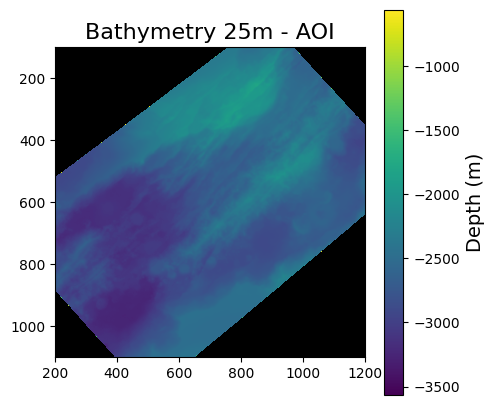

In [74]:
plotImage(file="data_in/Bathy_small_aoi_25m.tif", title='Bathymetry 25m - AOI', cbarName="Depth (m)", lower=-3565, upper=-560)

### Deriving products from the DEM using Whitebox tools

In [75]:
# Derive Hillshade and Slope from DEM
hillshade = wbt.hillshade(bathy_path,"hillshade.tif")
slope = wbt.slope(bathy_path, "slope.tif", zfactor=None, units="degrees")

.\whitebox_tools.exe --run="Hillshade" --wd="C:\Users\HP\uio.prog\MSc\small_aoi\whitebox_test" --dem='C:/Users/HP/uio.prog/MSc/small_aoi/whitebox_test/data_in/Bathy_small_aoi_25m.tif' --output='hillshade.tif' --azimuth=315.0 --altitude=30.0 -v --compress_rasters=False

****************************
* Welcome to Hillshade     *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Perf

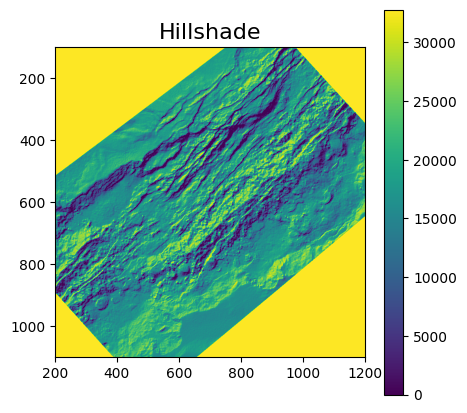

In [76]:
# Visualize hillshade 25m
plotImage(file="hillshade.tif", title='Hillshade', cbarName="", lower=0, upper=0)

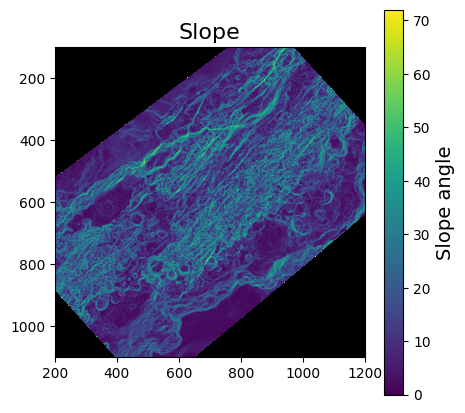

In [78]:
# Visualize slope 25m
plotImage(file="slope.tif", title='Slope', cbarName="Slope angle", lower=0, upper=72)

### DEM smoothing algorithms

Selected smoothing 3 algorithms from whitebox library:
- Gaussian Filter ([documentation](https://www.whiteboxgeo.com/manual/wbt_book/available_tools/image_processing_tools_filters.html#GaussianFilter))
- Median Filter ([documentation](https://www.whiteboxgeo.com/manual/wbt_book/available_tools/image_processing_tools_filters.html#medianfilter))
- Feature Preserving Smoothing Filter ([documentation](https://www.whiteboxgeo.com/manual/wbt_book/available_tools/geomorphometric_analysis.html#featurepreservingsmoothing))




In [79]:
# Calculate Gaussian and Median
bathy_gauss1 = wbt.gaussian_filter(bathy_path, "bathy_gauss1.0.tif", sigma=1.0)
bathy_gauss2 = wbt.gaussian_filter(bathy_path, "bathy_gauss1.5.tif", sigma=1.5)

bathy_median1 = wbt.median_filter(bathy_path, "bathy_median4-1.tif", filterx=4, filtery=4, sig_digits=1)
bathy_median2 = wbt.median_filter(bathy_path, "bathy_median7-1.tif", filterx=7, filtery=7, sig_digits=1)

.\whitebox_tools.exe --run="GaussianFilter" --wd="C:\Users\HP\uio.prog\MSc\small_aoi\whitebox_test" --input='C:/Users/HP/uio.prog/MSc/small_aoi/whitebox_test/data_in/Bathy_small_aoi_25m.tif' --output='bathy_gauss1.0.tif' --sigma=1.0 -v --compress_rasters=False

*****************************
* Welcome to GaussianFilter *
* Powered by WhiteboxTools  *
* www.whiteboxgeo.com       *
*****************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress

In [80]:
# Calculate Feature preserving smoothing
bathy_fps1 = wbt.feature_preserving_smoothing(bathy_path, "bathy_fps21-15-8.tif", filter=21, norm_diff=15, num_iter=8)
bathy_fps2 = wbt.feature_preserving_smoothing(bathy_path, "bathy_fps21-30-10.tif", filter=21, norm_diff=30, num_iter=10)

.\whitebox_tools.exe --run="FeaturePreservingSmoothing" --wd="C:\Users\HP\uio.prog\MSc\small_aoi\whitebox_test" --dem='C:/Users/HP/uio.prog/MSc/small_aoi/whitebox_test/data_in/Bathy_small_aoi_25m.tif' --output='bathy_fps21-15-8.tif' --filter=21 --norm_diff=15 --num_iter=8 --max_diff=0.5 -v --compress_rasters=False

*****************************************
* Welcome to FeaturePreservingSmoothing *
* Powered by WhiteboxTools              *
* www.whiteboxgeo.com                   *
*****************************************
Reading data...
Calculating normal vectors: 0%
Calculating normal vectors: 1%
Calculating normal vectors: 2%
Calculating normal vectors: 3%
Calculating normal vectors: 4%
Calculating normal vectors: 5%
Calculating normal vectors: 6%
Calculating normal vectors: 7%
Calculating normal vectors: 8%
Calculating normal vectors: 9%
Calculating normal vectors: 10%
Calculating normal vectors: 11%
Calculating normal vectors: 12%
Calculating normal vectors: 13%
Calculating normal 

### Calculate hillshade of smoothend DEMs for easier visualization/comparison

In [81]:
# Calculate hillshade
bathy_gauss_hillshade = wbt.hillshade(working_dir+"bathy_gauss1.0.tif","bathy_gauss1.0_hillshade.tif")
bathy_gauss_hillshade = wbt.hillshade(working_dir+"bathy_gauss1.5.tif","bathy_gauss1.5_hillshade.tif")

bathy_median_hillshade = wbt.hillshade(working_dir+"bathy_median4-1.tif","bathy_median4-1_hillshade.tif")
bathy_median_hillshade = wbt.hillshade(working_dir+"bathy_median7-1.tif","bathy_median7-1_hillshade.tif")

bathy_median_hillshade = wbt.hillshade(working_dir+"bathy_fps21-15-8.tif","bathy_fps21-15-8_hillshade.tif")
bathy_median_hillshade = wbt.hillshade(working_dir+"bathy_fps21-30-10.tif","bathy_fps21-30-10_hillshade.tif")

.\whitebox_tools.exe --run="Hillshade" --wd="C:\Users\HP\uio.prog\MSc\small_aoi\whitebox_test" --dem='C:/Users/HP/uio.prog/MSc/small_aoi/whitebox_test/bathy_gauss1.0.tif' --output='bathy_gauss1.0_hillshade.tif' --azimuth=315.0 --altitude=30.0 -v --compress_rasters=False

****************************
* Welcome to Hillshade     *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Pe

### Visual comparison of smoothend/filtered DEMs

Text(0.5, 1.0, 'FPS high')

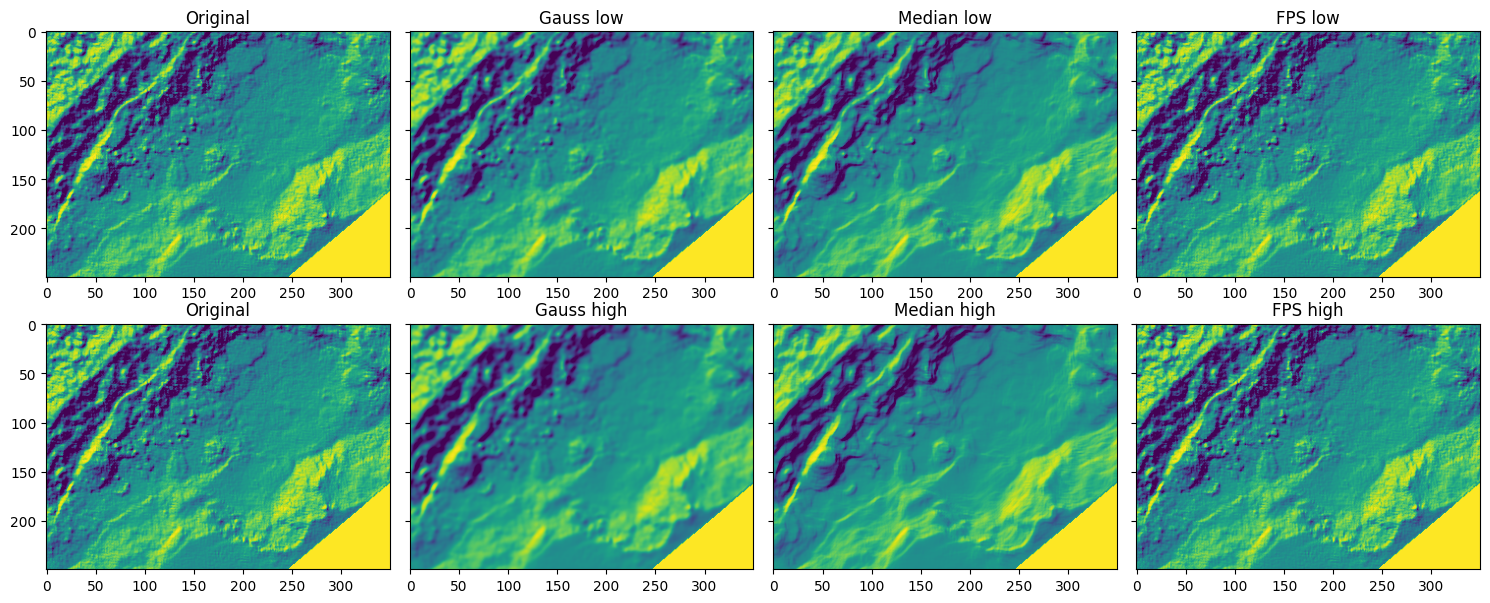

In [115]:
# Define the region of interest as a slice of the image
roi = (slice(650, 900), slice(650, 1000))

# Load the images and crop to the region of interest
image_names = ["hillshade.tif", "bathy_gauss1.0_hillshade.tif", "bathy_median4-1_hillshade.tif", "bathy_fps21-15-8_hillshade.tif", "bathy_gauss1.5_hillshade.tif",
               "bathy_median7-1_hillshade.tif", "bathy_fps21-30-10_hillshade.tif"]
loaded_images = []

for image in image_names:
    with rasterio.open(working_dir + image) as src:
        read_image = src.read(1, window=roi)
    loaded_images.append(read_image)

# Visualize the cropped images
f, axarr = plt.subplots(2, 4, figsize=(15, 6), tight_layout=True, sharey=True)
axarr[0, 0].imshow(loaded_images[0]); axarr[0, 1].imshow(loaded_images[1]);
axarr[0, 2].imshow(loaded_images[2]); axarr[0, 3].imshow(loaded_images[3]);
axarr[1, 0].imshow(loaded_images[0]); axarr[1, 1].imshow(loaded_images[4]);
axarr[1, 2].imshow(loaded_images[5]); axarr[1, 3].imshow(loaded_images[6]);

# Add titles
axarr[0,0].set_title("Original");    axarr[0,1].set_title("Gauss low");
axarr[0,2].set_title("Median low");  axarr[0,3].set_title("FPS low")
axarr[1,0].set_title("Original");    axarr[1,1].set_title("Gauss high");
axarr[1,2].set_title("Median high"); axarr[1,3].set_title("FPS high")


Will proceed with the Gaussian high filtered DEM for this example.

### Calculate Geomorphons

Standard geomorphons algorithm with the 10 most common landforms

In [117]:
# Calculate geomorphons
geomorphons = wbt.geomorphons(bathy_path, "geomorphons.tif", search=10, threshold=3.0, fdist=5, skip=2, forms=True, residuals=False)
geomorphons_gauss = wbt.geomorphons("bathy_gauss1.5.tif", "geomorphons_gauss.tif", search=10, threshold=3.0, fdist=5, skip=2, forms=True, residuals=False)

.\whitebox_tools.exe --run="Geomorphons" --wd="C:\Users\HP\uio.prog\MSc\small_aoi\whitebox_test" --dem='C:/Users/HP/uio.prog/MSc/small_aoi/whitebox_test/data_in/Bathy_small_aoi_25m.tif' --output='geomorphons.tif' --search=10 --threshold=3.0 --fdist=5 --skip=2 --forms -v --compress_rasters=False

****************************
* Welcome to Geomorphons   *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Generating global ternary codes...
Computing geomorphons...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Pr

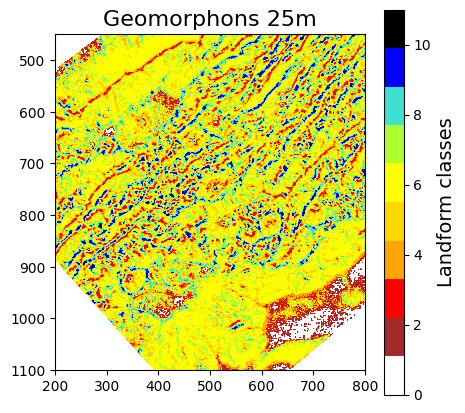

In [149]:
# Plotting geomorphons of original bathymetry
# define the colors for the colormap
colors_list = ['white', 'brown', 'red', 'orange', 'gold', 'yellow', 'greenyellow', 'turquoise', 'blue', 'black']
cmap = ListedColormap(colors_list)

# Load and plot bathymetry image
with rasterio.open(working_dir + "geomorphons.tif") as src:
    image = src.read(1)

# Plot the bathymetry image with the viridis colormap
fig, ax = plt.subplots(figsize=(5, 5))
norm = colors.Normalize(vmin=0, vmax=11)
im = ax.imshow(image, norm=norm, cmap=cmap)

# Set the x and y limits to zoom in on the central region of the image
ax.set_xlim(200, 800)
ax.set_ylim(1100, 450)

# Add a colorbar to the plot
cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.ax.set_ylabel('Landform classes', fontsize=14)

# Set axis labels and title
ax.set_title('Geomorphons 25m', fontsize=16); plt.show()

#### Geomorphons landformclasses

| Color | Description    |
|-------|----------------|
| ![#FFFFFF](https://via.placeholder.com/15/FFFFFF/000000?text=+) | Flat  |
| ![#A52A2A](https://via.placeholder.com/15/A52A2A/000000?text=+) | Summit  |
| ![#FF0000](https://via.placeholder.com/15/FF0000/000000?text=+) | Ridge   |
| ![#FFA500](https://via.placeholder.com/15/FFA500/000000?text=+) | Shoulder |
| ![#FFD700](https://via.placeholder.com/15/FFD700/000000?text=+) | Spur   |
| ![#FFFF00](https://via.placeholder.com/15/FFFF00/000000?text=+) | Slope  |
| ![#008000](https://via.placeholder.com/15/008000/000000?text=+) | Hollow   |
| ![#40E0D0](https://via.placeholder.com/15/40E0D0/000000?text=+) | Footslope  |
| ![#0000FF](https://via.placeholder.com/15/0000FF/000000?text=+) | Valley  |
| ![#000000](https://via.placeholder.com/15/000000/000000?text=+) | Depression  |

More details at:
https://grass.osgeo.org/grass82/manuals/r.geomorphon.html

or the original article:
https://www.sciencedirect.com/science/article/abs/pii/S0169555X12005028



### Comparing geomorphons output of original DEM and gaussian filtered DEM

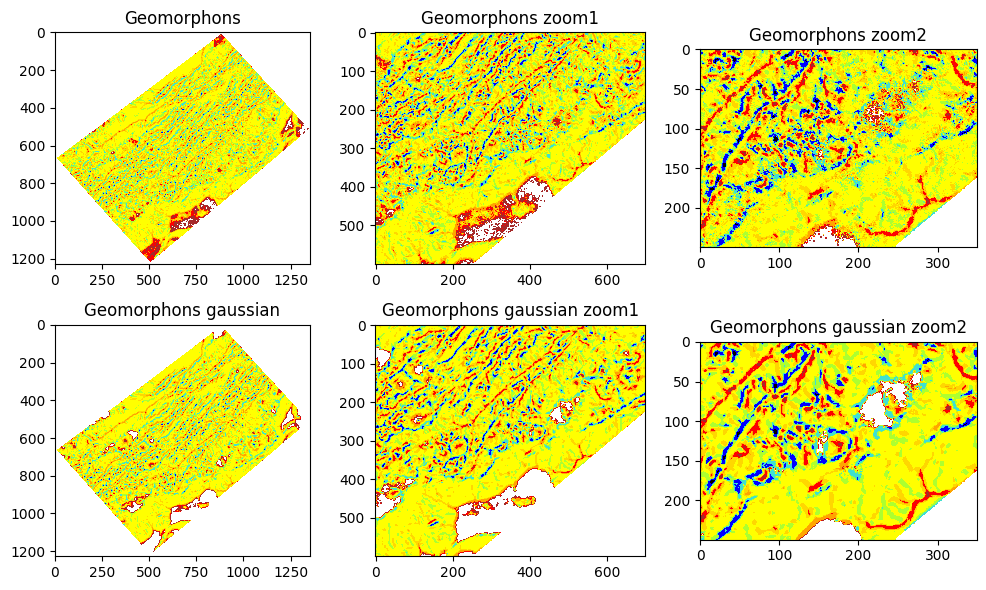

In [148]:
# Define the region of interest as a slice of the image
roi1 = (slice(500, 1100), slice(400, 1100))
roi2 = (slice(650, 900), slice(650, 1000))

with rasterio.open(working_dir+"geomorphons.tif") as src:
        gm_org = src.read(1)
        gm_roi1 = src.read(1, window=roi1)
        gm_roi2 = src.read(1, window=roi2)

with rasterio.open(working_dir+"geomorphons_gauss.tif") as src:
        gm_gauss_org = src.read(1)
        gm_gauss_roi1 = src.read(1, window=roi1)
        gm_gauss_roi2 = src.read(1, window=roi2)

# Visualize multiple images
f, axarr = plt.subplots(2, 3, figsize=(10, 6), tight_layout=True)
norm = colors.Normalize(vmin=0, vmax=11)
axarr[0, 0].imshow(gm_org, norm=norm, cmap=cmap);
axarr[0, 1].imshow(gm_roi1, norm=norm, cmap=cmap);
axarr[0, 2].imshow(gm_roi2, norm=norm, cmap=cmap);
axarr[1, 0].imshow(gm_gauss_org, norm=norm, cmap=cmap);
axarr[1, 1].imshow(gm_gauss_roi1, norm=norm, cmap=cmap);
axarr[1, 2].imshow(gm_gauss_roi2, norm=norm, cmap=cmap);

# Add titles
axarr[0,0].set_title("Geomorphons");   
axarr[0,1].set_title("Geomorphons zoom1");
axarr[0,2].set_title("Geomorphons zoom2");
axarr[1,0].set_title("Geomorphons gaussian");   
axarr[1,1].set_title("Geomorphons gaussian zoom1");   
axarr[1,2].set_title("Geomorphons gaussian zoom2");